<a href="https://colab.research.google.com/github/ismailsangu/IE423-TASK/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation:
#Can you segment customers by purchasing behavior?

## Initialize

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfRet =  pd.read_csv('/content/drive/MyDrive/Data_Sets/train.csv', encoding = "ISO-8859-1")

In [ ]:
dfRet.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
dfRet.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
dfRet.duplicated().value_counts()

False    550068
Name: count, dtype: int64

There is no duplication.

In [ ]:
dfRet.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

There are missed values.

# Prepare Data

In [ ]:
# Aggregate by customer ID
dfRtc = (dfRet.groupby('User_ID').agg({'User_ID':'count','Purchase':'sum'})
             .rename(columns={'User_ID':'Purchase_count', 'Purchase':'Purchase_sum'}))
dfRtc

,Purchase_count,Purchase_sum
User_ID,,
1000001,35,334093
1000002,77,810472
1000003,29,341635
1000004,14,206468
1000005,106,821001
...,...,...
1006036,514,4116058
1006037,122,1119538
1006038,12,90034


To prepare data, we have taken purchase data of customers, which is most important criteria for analyzing sales, and get rid of other datas, which have missed values and non-numerical values. Hence, we don't need any approach in Task 3 to find best mae.

In [ ]:
dfRtc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 1000001 to 1006040
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Purchase_count  5891 non-null   int64
 1   Purchase_sum    5891 non-null   int64
dtypes: int64(2)
memory usage: 138.1 KB


There is no problem with our new set.

In [ ]:
# Scale data
X = dfRtc
X[X.columns] = scale(X[X.columns])

The numerical features are standardized.

Text(0, 0.5, 'Purchase_sum')

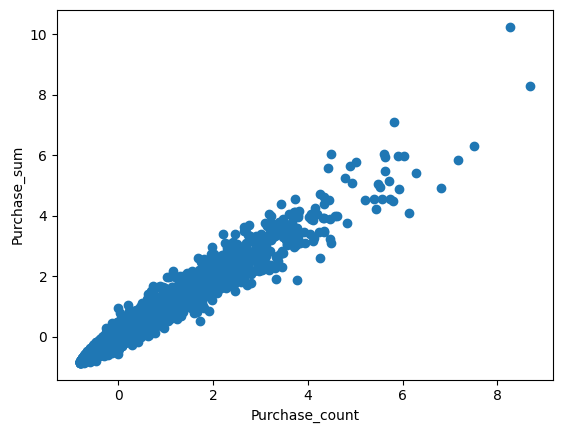

In [ ]:
# Visualize scatterplot

plt.scatter(X['Purchase_count'],X['Purchase_sum'])
plt.xlabel('Purchase_count')
plt.ylabel('Purchase_sum')

In order to segment the customers, let's start by a random assignment and then Iteratively improve the result.

### K-Means Clustering

**K-Means Clustering** makes easy for us to understand and implement segmentation by choosing random K centroids and iterating it until finding most stabil model.

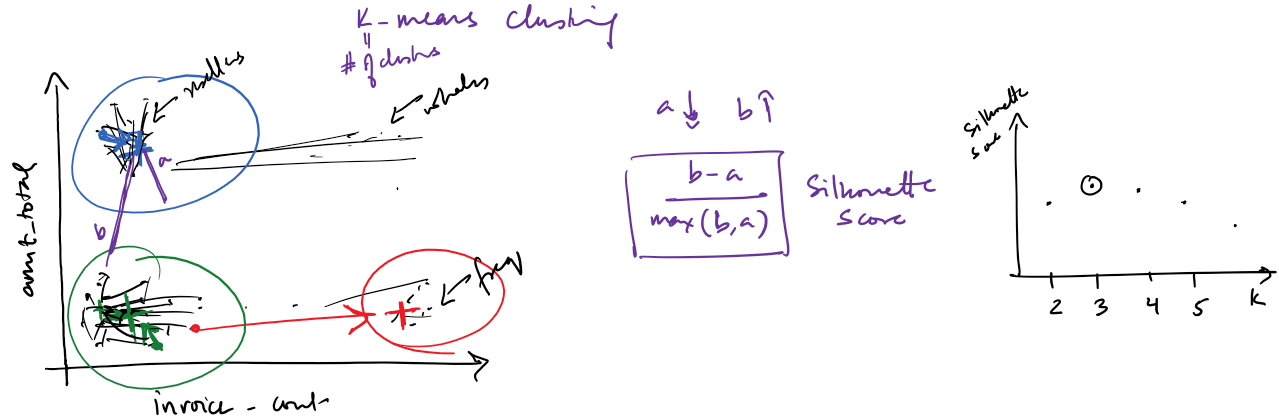

In [ ]:
# Build k-Means Clustering model

from sklearn.cluster import KMeans

mdlKmcRtc = KMeans(n_clusters=3, random_state=1)
mdlKmcRtc.fit(X)
kMeans_labels = mdlKmcRtc.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering')

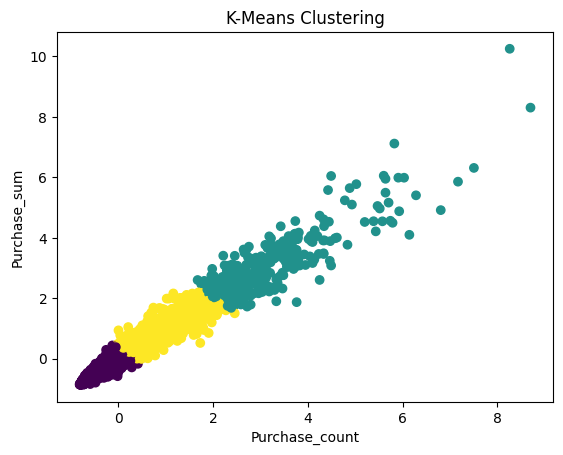

In [ ]:
# Display k-Means cluster on scatter plot

plt.scatter(X['Purchase_count'],X['Purchase_sum'],c=kMeans_labels)
plt.xlabel('Purchase_count')
plt.ylabel('Purchase_sum')
plt.title('K-Means Clustering')

We divide scatter plot to 3 part by n_clusters=3. Now we have 3 segments for purchase of customers.

We have to need **Silhouette Score** of the clusterings to find best model having object is well matched to its own cluster and poorly matched to neighboring clusters, which is equal to high Silhouette Score.

In [ ]:
# Evaluate quality of clusters
from sklearn.metrics import silhouette_score

silhouette_score(X, mdlKmcRtc.labels_)

0.6652767061197826

In [ ]:
# Function for K-means Clustering
def cluster_kMeans(X, k):
    mdlKmcRtc = KMeans(n_clusters=k, random_state=1)
    mdlKmcRtc.fit(X)
    kMeans_labels = mdlKmcRtc.labels_
    kMeans_sil_score = silhouette_score(X, mdlKmcRtc.labels_)
    return (kMeans_labels, kMeans_sil_score)

In [ ]:
# Iterate over different values of k to determine best silhouette score

for k in range(2,7):
    kMeans_labels, kMeans_sil_score = cluster_kMeans(X,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', kMeans_sil_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  2 		 Silhouette Score:  0.7261408452722743


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  3 		 Silhouette Score:  0.6652767061197826


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  4 		 Silhouette Score:  0.6076933751194181


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  5 		 Silhouette Score:  0.5846368698345823


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  6 		 Silhouette Score:  0.5749005958029301


The best cluster size seems to be '2' at which the Silhouette Score is 0.726, which means when we have 2 segments, the objects have best match on their own clusters.

Let's see if we can improve the customer segmentation by starting with each customer in its own cluster and then *Hierarchically* grouping them together... (This is only possible when the dataset is small)

### Hierarchical Clustering

In [ ]:
# Generate linkages between data points
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X, 'ward')

Text(0.5, 1.0, 'Hierarchical Clustering')

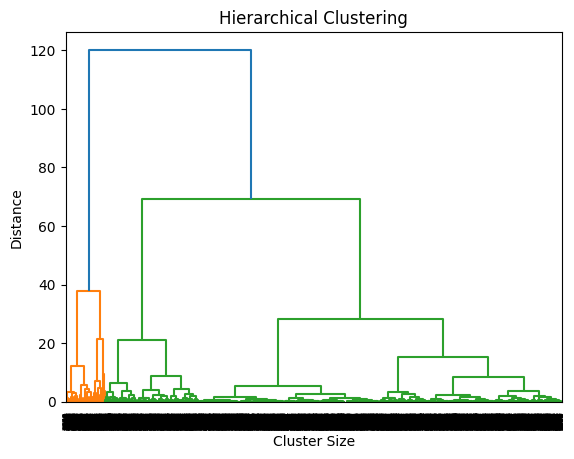

In [ ]:
# Visualize Dendrogram of Clusters

hierarchy.dendrogram(Z)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering')

As we can see The greater the y-axis distance, the more spaced apart the clusters are. So, after 2 cluster model becomes worse and not ideal. We can input n_clusters to find best score instead of waiting for  generation of full dendogram.


In [60]:
# Build Hierarchical Clustering model
from sklearn.cluster import AgglomerativeClustering

mdlHrcRtc = AgglomerativeClustering(n_clusters=2)
mdlHrcRtc.fit(X)
hClust_labels = mdlHrcRtc.labels_
silhouette_score(X, mdlHrcRtc.labels_)

0.7454258816188772

In [61]:
# Build Hierarchical Clustering model
from sklearn.cluster import AgglomerativeClustering

mdlHrcRtc = AgglomerativeClustering(n_clusters=3)
mdlHrcRtc.fit(X)
hClust_labels = mdlHrcRtc.labels_
silhouette_score(X, mdlHrcRtc.labels_)

0.6415136338507116

In [62]:
# Build Hierarchical Clustering model
from sklearn.cluster import AgglomerativeClustering

mdlHrcRtc = AgglomerativeClustering(n_clusters=10)
mdlHrcRtc.fit(X)
hClust_labels = mdlHrcRtc.labels_
silhouette_score(X, mdlHrcRtc.labels_)

0.4830097565263201

Text(0.5, 1.0, 'Hierarchical Clustering')

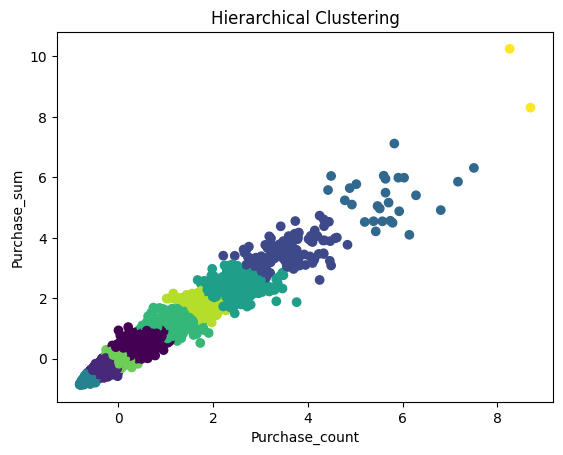

In [63]:
# Display Hierarchical cluster on scatter plot

plt.scatter(X['Purchase_count'],X['Purchase_sum'],c=hClust_labels)
plt.xlabel('Purchase_count')
plt.ylabel('Purchase_sum')
plt.title('Hierarchical Clustering')

In [ ]:
# Function for Hierarchical Clustering
def cluster_hierarchy(X, k):
    mdlHrcRtc = AgglomerativeClustering(n_clusters=k)
    mdlHrcRtc.fit(X)
    hClust_labels = mdlHrcRtc.labels_
    hClust_sil_score = silhouette_score(X, mdlHrcRtc.labels_)
    return (hClust_labels, hClust_sil_score)

In [ ]:
# Iterate over different values of k to determine best silhouette score

for k in range(2,7):
    hClust_labels, hClust_sil_score = cluster_hierarchy(X,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', hClust_sil_score)

k:  2 		 Silhouette Score:  0.7454258816188772
k:  3 		 Silhouette Score:  0.6415136338507116
k:  4 		 Silhouette Score:  0.6399901867458228
k:  5 		 Silhouette Score:  0.506267207431757
k:  6 		 Silhouette Score:  0.5070500323467254


Even in Hierarchical Clustering, the ideal cluster size is '2', which is reassuring.  However, the cluster labels seem to be slightly better now with a Silhouette Score of 0.745 over the score of 0.726 in K-Means Clustering.

utexas_ds_orie_divider_gray.png

### DBScan Clustering and Anomaly Detection

DBScan model is clustering values by distance measure and minimum number of points.

In [ ]:
# Build DBScan model

from sklearn.cluster import DBSCAN

mdlDbsRtc = DBSCAN(eps=0.2)
mdlDbsRtc.fit(X)
dbscan_labels = mdlDbsRtc.labels_

In [ ]:
silhouette_score(X, dbscan_labels)

0.6568861530009426

In [ ]:
# calculate number of clusters
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_clusters

4

In [ ]:
# calculate number of anomalies
dbscan_anomalies = list(dbscan_labels).count(-1)
dbscan_anomalies

60

Text(0.5, 1.0, 'DBScan Clustering')

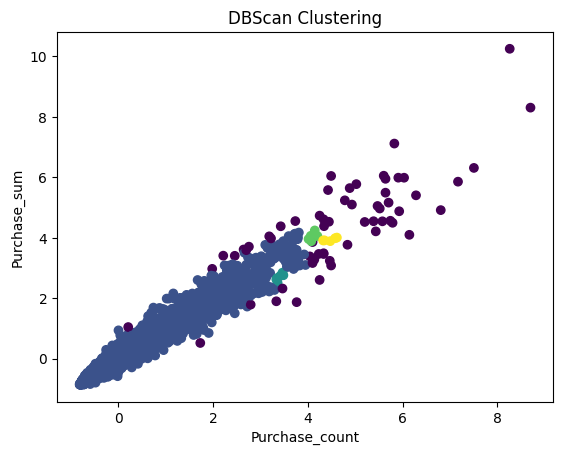

In [ ]:
# Display DBScan cluster on scatter plot

plt.scatter(X['Purchase_count'],X['Purchase_sum'],c=dbscan_labels)
plt.xlabel('Purchase_count')
plt.ylabel('Purchase_sum')
plt.title('DBScan Clustering')

In [ ]:
# Function for DBScan Clustering

def cluster_dbscan(X, e):
    mdlDbsRtc = DBSCAN(eps=e)
    mdlDbsRtc.fit(X)
    dbscan_labels = mdlDbsRtc.labels_
    dbscan_sil_score = silhouette_score(X, dbscan_labels)

    # count number of clusters and noise points
    dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    dbscan_anomalies = list(dbscan_labels).count(-1)
    return(dbscan_clusters, dbscan_anomalies, dbscan_sil_score)

In [ ]:
# Iterate over different values of eps to determine best silhouette score

for eps in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    dbscan_clusters, dbscan_anomalies, dbscan_sil_score = cluster_dbscan(X, eps)
    print('eps: ',eps,'\t', 'Clusters: ', dbscan_clusters, '\t', 'Noise: ', dbscan_anomalies, '\t', 'Silhouette Score: ', dbscan_sil_score)

eps:  0.1 	 Clusters:  10 	 Noise:  255 	 Silhouette Score:  0.5661972006437398
eps:  0.2 	 Clusters:  4 	 Noise:  60 	 Silhouette Score:  0.6568861530009426
eps:  0.3 	 Clusters:  1 	 Noise:  40 	 Silhouette Score:  0.8024435045110658
eps:  0.4 	 Clusters:  3 	 Noise:  20 	 Silhouette Score:  0.7872811055480032
eps:  0.5 	 Clusters:  3 	 Noise:  15 	 Silhouette Score:  0.7927236996940684
eps:  0.6 	 Clusters:  3 	 Noise:  7 	 Silhouette Score:  0.7943119387842261
eps:  0.7 	 Clusters:  2 	 Noise:  6 	 Silhouette Score:  0.8011975322057425


The highest Silhouette Score in the DBScan model is for a cluster size '1', but it really means there would be 2 clusters where the second cluster is a collection of all the outliers and it gives best score. It also determines outliers.



#Conclusion
* By using only purchase data for segmentation, additional aprroaches to preapare data for best mae are got rid of.
* K-Means Clustering* is used firstly and gives Silhouette Score:0.726 for n_clustering=2 by choosing random centroids.
* Hierarchical Clustering is used after that and gives Silhouette Score:0.745 for n_clustering=2, which is better than K-Means Clustering by assaigning each data point to own cluster.
* DBScan model gives the best Silhouette Score:0.802 by clustering according to distance measurement among data points,density, and providing outliers.
